In [1]:
# Import Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn import preprocessing
from tensorflow.keras import models, layers

In [2]:
# Load Boston housing dataset
(train_data, train_targets), (test_data, test_targets) = tf.keras.datasets.boston_housing.load_data()

In [3]:
# Look at the data
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)
print(train_targets[:10])

Train data shape:  (404, 13)
Test data shape:  (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [4]:
# Normalize data with TRAINING DATA
normal_train_data = preprocessing.scale(train_data)
normal_test_data = preprocessing.scale(train_data)

In [5]:
# Create a function to build the model
def build_model():
    model = models.Sequential() # Construct model
    model.add(layers.Dense(64, activation='relu', # Hidden Layer 1
                           input_shape = (train_data.shape[1],))) 
    model.add(layers.Dense(64, activation='relu')) # Hidden Layer 2 inherits 64 unit input
    model.add(layers.Dense(1)) # output Layer
    model.compile(optimizer= 'rmsprop', loss= 'mse', metrics=['mae'])
    return model

In [6]:
# K-fold Validation to adjsut parameters of networks: Typically K = 4 or 5

k= 4 # Number of folds
num_val_samples = len(train_data) // k # Floor division to round to nearest whole number
num_epochs = 500 # Wide range of epochs that will try to find optimal value
all_mae_histories = [] # Record of how well the model does at each epoch

In [7]:
# Perform Cross-validation for K folds 
for i in range(k):
    print("processing fold #", i)
    
    # Prepare validation data
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    # Preapre the training data 
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                        train_data[(i+1)*num_val_samples:]],
                                       axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                           train_targets[(i+1)*num_val_samples:]],
                                          axis=0)
    
    # Build the model
    model = build_model()
    
    # Train the model
    history = model.fit(partial_train_data, partial_train_targets, 
                       validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size = 1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [8]:
# compute the average per-epoch MAE scores for all folds
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

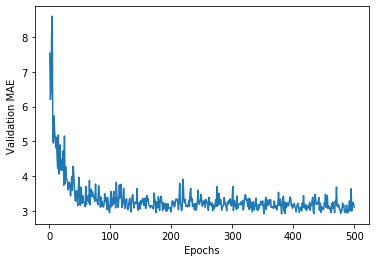

In [9]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

In [10]:
# To smooth the previous graph
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

Text(0, 0.5, 'Validation MAE')

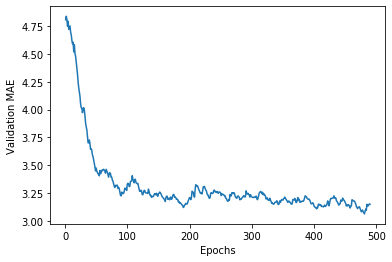

In [11]:
smoothed_mae_history = smooth_curve(average_mae_history[10:])

# Plot new smoothed graph
plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')

In [18]:
# Build and fit new model with 80 epochs
model = build_model()
model.fit(train_data, train_targets,
         epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)
print(test_mse_score)

102/102 [==============================] - 0s 691us/sample - loss: 33.7699 - mae: 4.0110
4.0110292
33.76990434235218
